In [1]:
%matplotlib notebook
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(1)
N, D = 20, 2
X = np.zeros([N, D])
Z = np.random.rand(N) * 5


X[:, 0] = Z * np.cos(np.pi/6.) + np.random.randn(N) * 0.4
X[:, 1] = Z * np.sin(np.pi/6.) + np.random.randn(N) * 0.4
X -= X.mean(axis=0)

In [3]:
pca = PCA(n_components=1)
pca.fit(X)
v = pca.components_[0]
Z = pca.transform(X)
X_2 = pca.inverse_transform(Z)
pca.components_.shape

(1, 2)

<IPython.core.display.Javascript object>


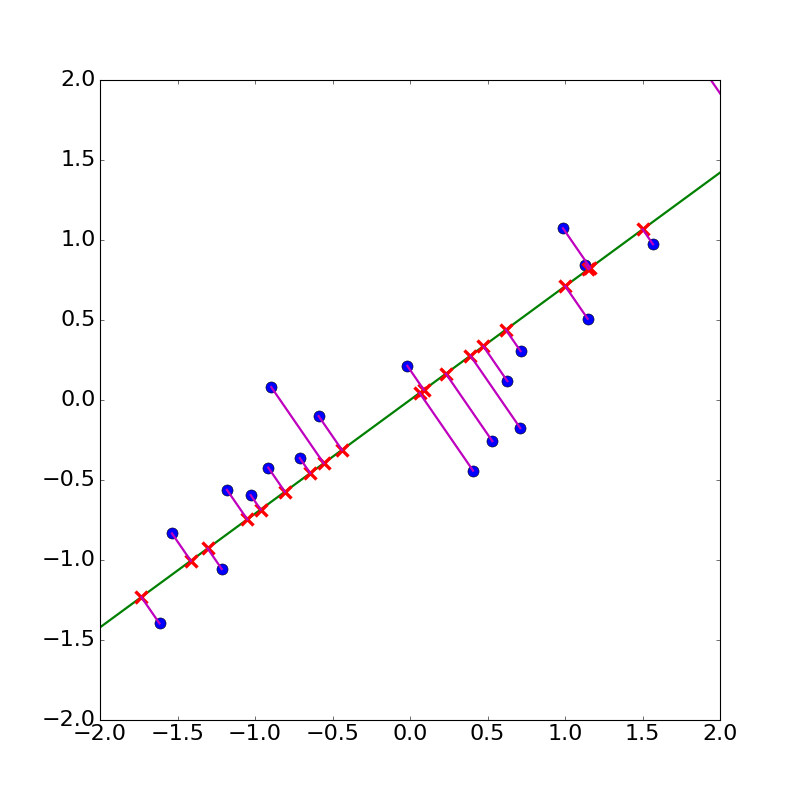

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xmin, xmax = -2, 2
ax.set_xlim(xmin, xmax)
ax.set_ylim(-2, 2)
ax.tick_params(axis='both', labelsize='20')
# ax.set_title('PCA', fontsize=25)

ax.plot(X[:, 0], X[:, 1], ls='', marker='o', markersize=10, c='b')

ax.plot([xmin, xmax], [v[1]/v[0] * xmin, v[1]/v[0] * xmax], lw=2, c='g')
ax.plot(X_2[:, 0], X_2[:, 1], ls='', marker='x', markersize=10, markeredgewidth=3, c='r')

for i in range(N):
    ax.plot([X[i, 0], X_2[i, 0]], [X[i, 1], X_2[i, 1]], c='m', lw=2)

<IPython.core.display.Javascript object>


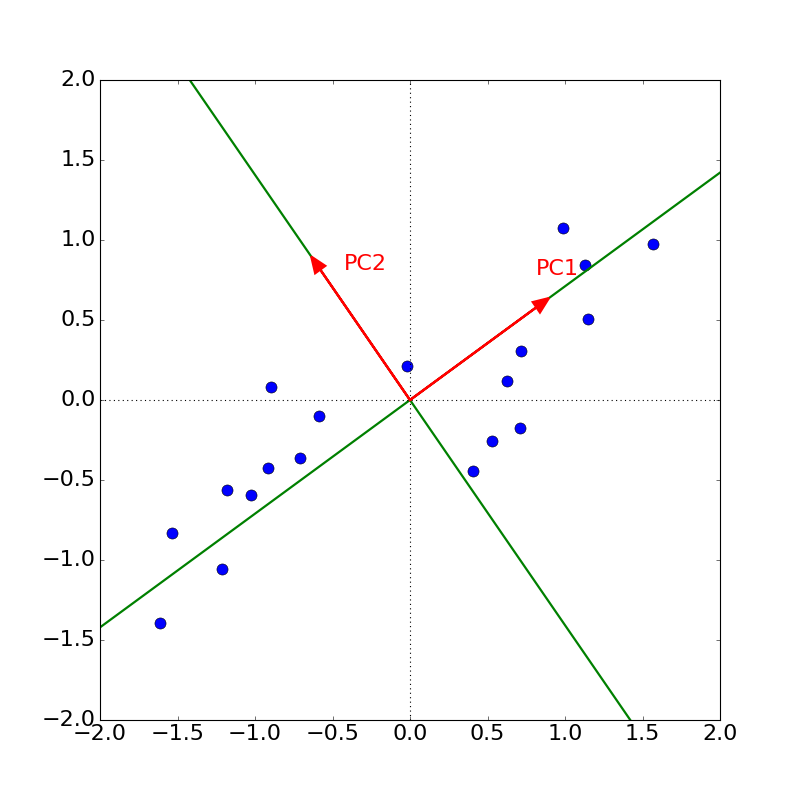

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xmin, xmax = -2, 2
ymin, ymax = -2, 2
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.tick_params(axis='both', labelsize='20')
# ax.set_title('PCA', fontsize=25)

ax.plot(X[:, 0], X[:, 1], ls='', marker='o', markersize=10, c='b')

ax.plot([xmin, xmax], [v[1]/v[0] * xmin, v[1]/v[0] * xmax], lw=2, c='g' )
ax.plot([-(v[1]* ymin)/v[0], (-v[1] * ymax)/v[0]], [ymin, ymax], lw=2, c='g',)

ax.plot([xmin, xmax], [0, 0], c='k', ls=':')
ax.plot([0, 0], [ymin, ymax], c='k', ls=':')
ax.arrow(0, 0, -v[0], -v[1], fc='r', ec='r', lw=2, head_length=0.1, head_width=0.08, zorder=3)
ax.arrow(0, 0, v[1], -v[0], fc='r', ec='r', lw=2, head_length=0.1, head_width=0.08, zorder=3)
ax.text(-v[0], -v[1] + 0.2, 'PC1', color='r', fontsize=20)
ax.text(v[1] + 0.15, -v[0], 'PC2', color='r', fontsize=20)

#ax.arrow(x1, y1, 0.8 * (x1_l1 - x1), 0.8* (y1_l1 - y1), fc='m', ec='m', lw=2, head_length=0.1, head_width=0.08)

# ax.plot(X_2[:, 0], X_2[:, 1], ls='', marker='x', markersize=10, markeredgewidth=3, c='r')

# for i in range(N):
#    ax.plot([X[i, 0], X_2[i, 0]], [X[i, 1], X_2[i, 1]], c='m', lw=2)
    
# print -v[1] * v[0] + v[1] * v[0]